In [6]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch

from libs.TrafficGenerator import DatasetConvertor 
from libs.TrafficPredictor.ContextAssisted import PreparingDataset as PreparingDatasetCA
from libs.TrafficPredictor.ContextAssisted import trainModelByDefaultSetting as trainModelCA
from libs.TrafficPredictor.ContextAssisted import evaluateModelTest as evaluateModelCA
from libs.TrafficPredictor.ContextAssisted import createModel as createModelCA
from libs.TrafficPredictor.ContextFree import PreparingDataset as PreparingDatasetCF
from libs.TrafficPredictor.ContextFree import trainModelByDefaultSetting as trainModelCF
from libs.TrafficPredictor.ContextFree import evaluateModelTest as evaluateModelCF
from libs.TrafficPredictor.ContextFree import createModel as createModelCF
from libs import encode_float_filename, decode_float_filename

In [7]:
stringFile = encode_float_filename(0.5)
floatFile = decode_float_filename(stringFile)
print(stringFile)
print(floatFile)

5_00e-01.txt
0.5


In [8]:
dbParams = 0.01
direction = "forward"
#dbParams = 0.15
#direction = "backward"
mode = "fixed"
#mode = "adaptive"
alpha = 0.5
lenWindow_list = [10]

rawDatasetFolder = "Dataset"
datasetConverter = DatasetConvertor(rawDatasetFolder)
datasetConverter.processDataset(dbParameter=dbParams, alpha=alpha, mode=mode, direction=direction)
thumbUnit = datasetConverter.getDataUnit('thumb_fr')
#thumbUnit = datasetConverter.getDataUnit('thumb_bk')

========== thumb ============
Forward: Compression rate:0.22314470485360394
========== index ============
Forward: Compression rate:0.24555334544091786
========== middle ============
Forward: Compression rate:0.24907031047306064


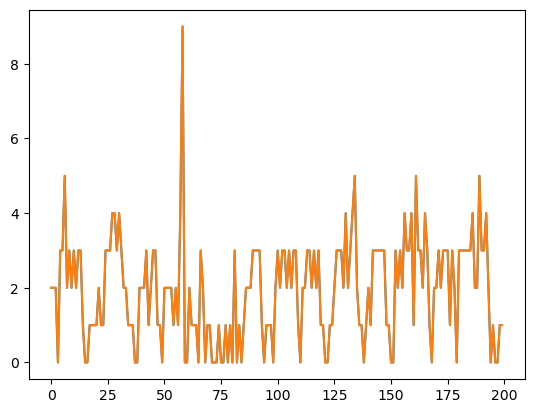

In [9]:
lenWindow = 10
paramsCA = {}
paramsCA['lenSource'] = lenWindow
paramsCA['lenTarget'] = lenWindow
paramsCA['trainRatio'] = 0.8
paramsCA['dataAugment'] = False
paramsCA['smoothFc'] = 2.5
paramsCA['smoothOrder'] = 3
trainDataCA, testDataCA = PreparingDatasetCA(thumbUnit, paramsCA, verbose=False)

paramsCF = {}
paramsCF['lenWindow'] = lenWindow
paramsCF['lenSource'] = 10
paramsCF['lenTarget'] = 1
paramsCF['trainRatio'] = 0.8
paramsCF['dataAugment'] = False

trainDataCF, testDataCF = PreparingDatasetCF(thumbUnit, paramsCF, verbose=False)

trafficCA = testDataCA[5]
trafficCF = testDataCF[1] 
plt.plot(trafficCA[9:208])
plt.plot(trafficCF[0:200,0,0])
plt.show()

(2080, 1)
(2069, 1, 1)


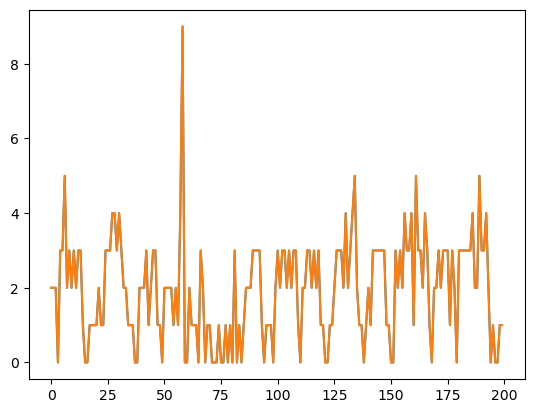

(2080, 1)
(2069,)


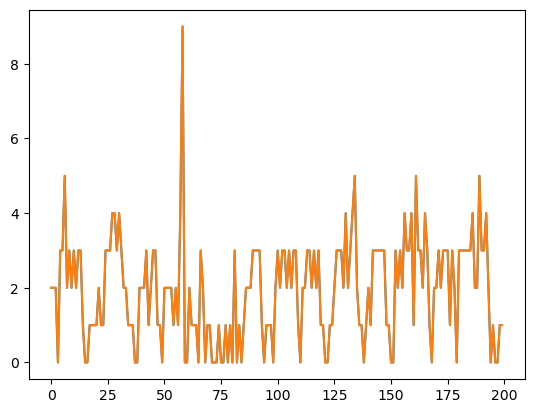

In [14]:
trafficCA_np = testDataCA[5]
trafficCF_np = testDataCF[1]
print(trafficCA_np.shape)
print(trafficCF_np.shape)
plt.plot(trafficCA_np[9:208])
plt.plot(trafficCF_np[0:200,0,0])
plt.show()

trafficCA = evaluateModelCA(testDataCA, batch_size=4096)
trafficCF = evaluateModelCF(testDataCF, batch_size=4096)
print(trafficCA.shape)
print(trafficCF.shape)

plt.plot(trafficCA[9:208])
plt.plot(trafficCF[0:200])
plt.show()